In [57]:
from agentlab.experiments.exp_utils import RESULTS_DIR
from agentlab.analyze import inspect_results
from agentlab.experiments.study import get_most_recent_study

### Load results
find the most recent study and load all summary information in a result dataframe

In [58]:
# replace this by your desired directory if needed.
result_dir = get_most_recent_study(RESULTS_DIR, contains=None)

print(result_dir)
result_df = inspect_results.load_result_df(result_dir)

/Users/alexandre.lacoste/agentlab_results/2025-08-11_13-45-19_genericagent-gpt-5-nano-2025-08-07-on-miniwob-task-name-enter


Loading results: 100%|██████████| 35/35 [00:00<00:00, 92.25it/s]


In [59]:
report = inspect_results.global_report(result_df)
inspect_results.display_report(report)

Found multiple configuration, averaging across tasks and returning a per-agent report.


,agent.agent name,env.benchmark,avg reward,std err,avg steps,n completed,n err,cum cost
0,GenericAgent-gpt-5-nano-2025-08-07,miniwob,0.886,0.054,2.429,35/35,0,0


### Print error report if any

In [60]:
inspect_results.error_report(result_df, max_stack_trace=2, use_log=True)

''

### Load steps of one episode

### Inspect the keys in the result dataframe

In [ ]:
for key in result_df.keys():
    print(key)

action: click('14')
reward: 0.0
AXTree: RootWebArea 'Circle Center Task', focused
	[13] image '', clickable, visible
	[14] button 'Submit', clickable, visible
screenshot type: <class 'numpy.ndarray'>


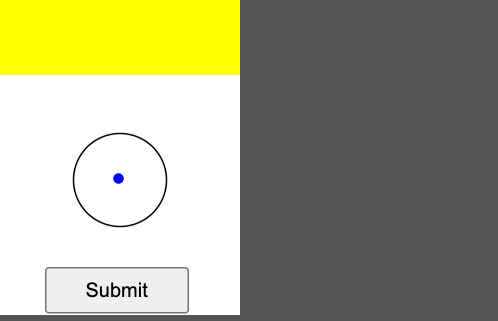

In [61]:
from agentlab.experiments.loop import ExpResult

# lazy loader for all the information of on experiment (1 agent on 1 task)
result = ExpResult(result_df.iloc[0].exp_dir)

episode = result.steps_info
print(f"action: {episode[1].action}")
print(f"reward: {episode[1].reward}")
print(f"AXTree: {episode[1].obs['axtree_txt'][:500]}")

# formatted as an array
print(f"screenshot type: {type(episode[1].obs['screenshot'])}")

# loading from png
display(result.get_screenshot(1))

### list keys in the observations dict

In [ ]:
import json

print(f"Obs Keys:\n  {'\n  '.join(list(episode[1].obs.keys()))}")

Obs Keys:
  chat_messages
  goal
  goal_object
  open_pages_urls
  open_pages_titles
  active_page_index
  url
  dom_object
  axtree_object
  extra_element_properties
  focused_element_bid
  last_action
  last_action_error
  elapsed_time
  dom_txt
  axtree_txt
  pruned_html
  screenshot
{
  "0": {
    "visibility": 1.0,
    "bbox": [
      0.0,
      0.0,
      498.0,
      315.0
    ],
    "clickable": false,
    "set_of_marks": false
  },
  "1": {
    "visibility": 0.0,
    "bbox": null,
    "clickable": false,
    "set_of_marks": false
  },
  "2": {
    "visibility": 0.0,
    "bbox": null,
    "clickable": false,
    "set_of_marks": false
  },
  "3": {
    "visibility": 0.0,
    "bbox": null,
    "clickable": false,
    "set_of_marks": false
  },
  "4": {
    "visibility": 0.0,
    "bbox": null,
    "clickable": false,
    "set_of_marks": false
  },
  "5": {
    "visibility": 0.0,
    "bbox": null,
    "clickable": false,
    "set_of_marks": false
  },
  "6": {
    "visibility": 0.0

In [ ]:
extra_properties = json.dumps(episode[1].obs["extra_element_properties"], indent=2)
print(extra_properties)